<a href="https://colab.research.google.com/github/begumpoly/Golden-Globe-Awards/blob/main/goldenglobe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Import the pandas library for data manipulation and analysis, commonly aliased as 'pd'.
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib for creating plots and visualizations, commonly aliased as 'plt'.
import seaborn as sns # Import the seaborn library, which is based on matplotlib and provides a high-level interface for drawing attractive statistical graphics, commonly aliased as 'sns'.
import plotly.figure_factory as ff # Import the figure_factory module from the plotly library, which contains functions to create specific types of figures, commonly aliased as 'ff'.
from IPython.display import display, HTML # Import the display and HTML functions from IPython.display for enhanced output display in Jupyter notebooks.
import plotly.express as px # Import the express module from the plotly library, a high-level API for quickly creating plotly figures, commonly aliased as 'px'.
import plotly.graph_objects as go # Import the graph_objects module from the plotly library, the lower-level API for creating detailed plotly figures, commonly aliased as 'go'.
import plotly.subplots as sp # Import the subplots module from the plotly library, used for creating figures with multiple plots arranged in a grid, commonly aliased as 'sp'.

In [ ]:
# Define the path to the dataset file
file_path='/content/golden_globe_awards.csv'
#Read the CSV file into a pandas DataFrame
df=pd.read_csv(file_path)

In [ ]:
df.shape #Display the dimensions (rows, columns) of the DataFrame


(7991, 7)

In [ ]:
df.columns # Display the names of the columns in the DataFrame

Index(['year_film', 'year_award', 'ceremony', 'category', 'nominee', 'film',
       'win'],
      dtype='object')

In [ ]:
df.info()# Print a concise summary of the DataFrame. This includes the index dtype and columns, non-null values in each column, data types, and memory usage. It's a good way to quickly inspect the data structure.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_film   7991 non-null   int64 
 1   year_award  7991 non-null   int64 
 2   ceremony    7991 non-null   int64 
 3   category    7991 non-null   object
 4   nominee     7991 non-null   object
 5   film        6191 non-null   object
 6   win         7991 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


In [ ]:
df.isnull().sum()# Count the number of missing values for each column

,0
year_film,0
year_award,0
ceremony,0
category,0
nominee,0
film,1800
win,0


In [ ]:
#Removing Duplicates:

df.drop_duplicates(inplace=True)


In [ ]:
df.columns = df.columns.str.replace(' ', '')# removes spaces in each column name

In [ ]:
df.head()


,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [ ]:
df['film'] = df['film'].fillna('N/s')

In [ ]:
print(df['film'])

0       For Whom The Bell Tolls
1       For Whom The Bell Tolls
2        The Song Of Bernadette
3                           N/A
4        The Song Of Bernadette
                 ...           
7986                 Succession
7987                    Fleabag
7988                      Barry
7989                        N/A
7990                        N/A
Name: film, Length: 7991, dtype: object


In [32]:
df.to_csv('golden_globe_awards_cleaned.csv', index=False)# cleaned data


In [34]:
# Read the cleaned CSV file back into a new DataFrame
cleaned_df = pd.read_csv('golden_globe_awards_cleaned.csv')

Count plot of Award Categories

<ipython-input-35-225cca08a6c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis') # Create the count plot


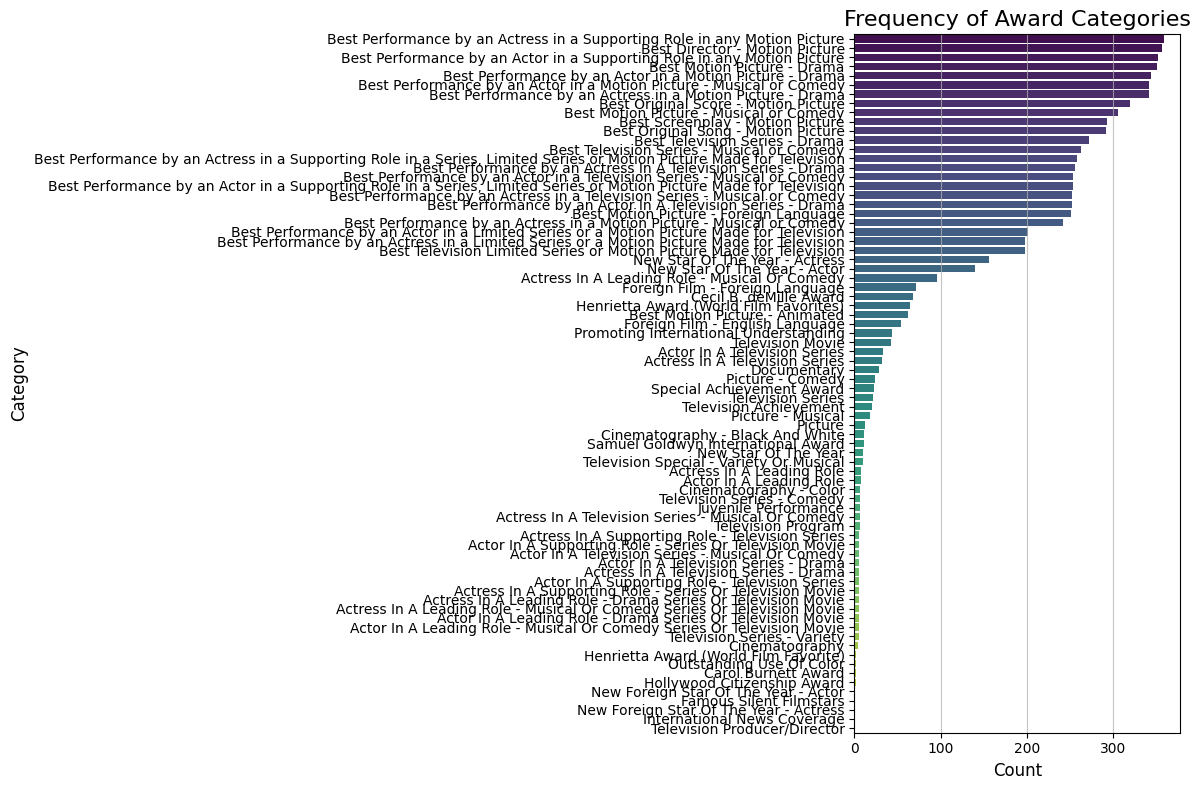

In [35]:
plt.figure(figsize=(12, 8)) # Set the figure size for better readability
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis') # Create the count plot
plt.title('Frequency of Award Categories', fontsize=16) # Set the title
plt.xlabel('Count', fontsize=12) # Set the x-axis label
plt.ylabel('Category', fontsize=12) # Set the y-axis label
plt.grid(axis='x', alpha=0.75) # Add a horizontal grid for better readability
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

In [37]:

category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

fig = px.treemap(category_counts, path=['category'], values='count',
                 title='Proportion of Award Categories')
fig.show()

<ipython-input-47-2580f0a2495a>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




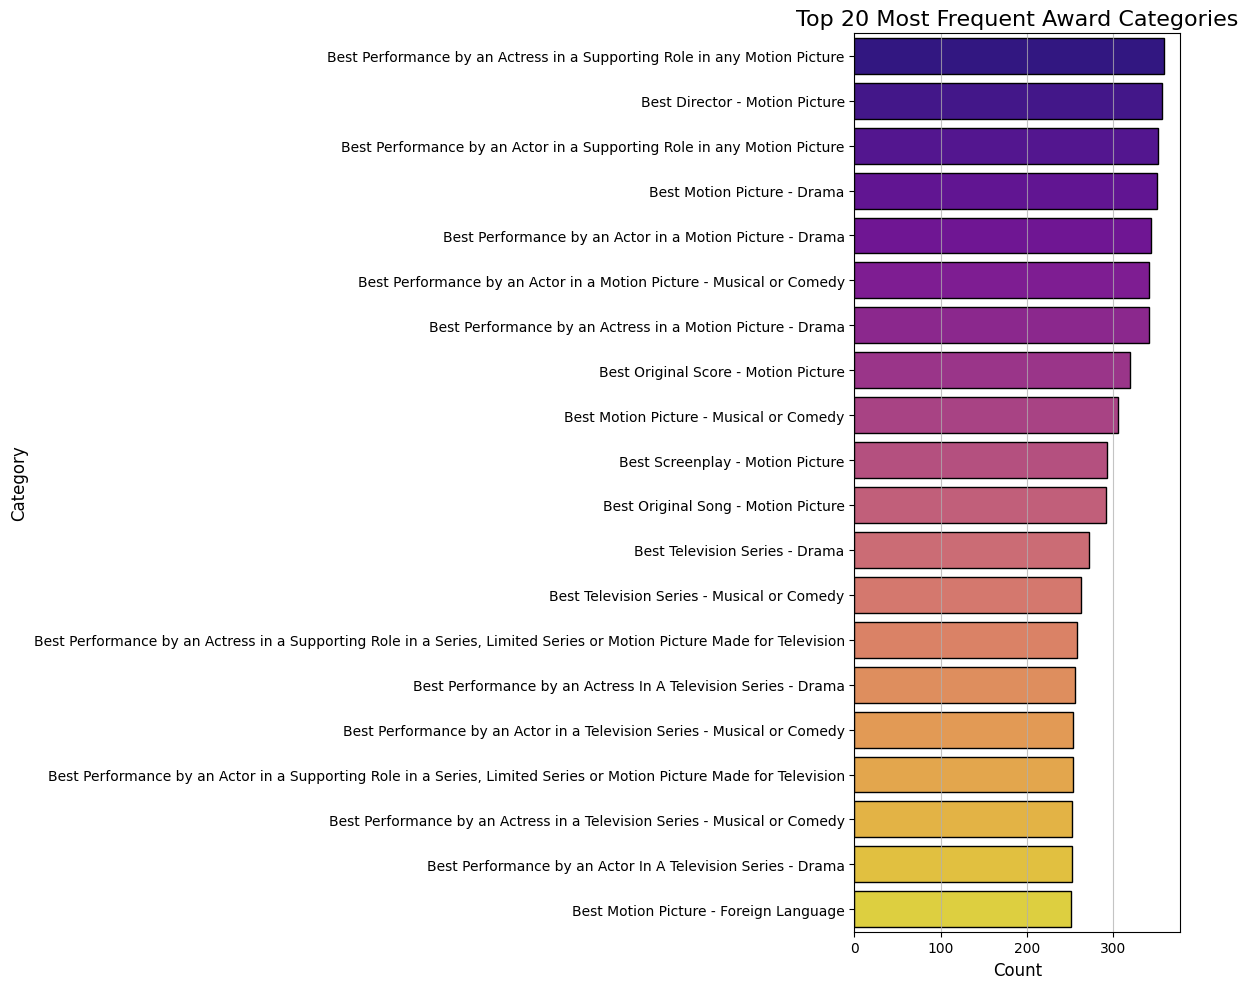

In [47]:
## Get the top 20 categories by count
top_20_categories = df['category'].value_counts().nlargest(20).index

## Filter the DataFrame to include only the top 20 categories
df_top_20 = df[df['category'].isin(top_20_categories)]

## Create the count plot for the top 20 categories
plt.figure(figsize=(12, 10)) # Adjust figure size to accommodate 20 bars
sns.countplot(data=df_top_20, y='category', order=top_20_categories, palette='plasma', edgecolor='black')
plt.title('Top 20 Most Frequent Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

## Set plot titles and labels
plt.title('Top 20 Most Frequent Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

## Add a grid for better readability
plt.grid(axis='x', alpha=0.75)

## Adjust layout
plt.tight_layout()

## Display the plot
plt.show();

<ipython-input-51-b94f94f8db5f>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




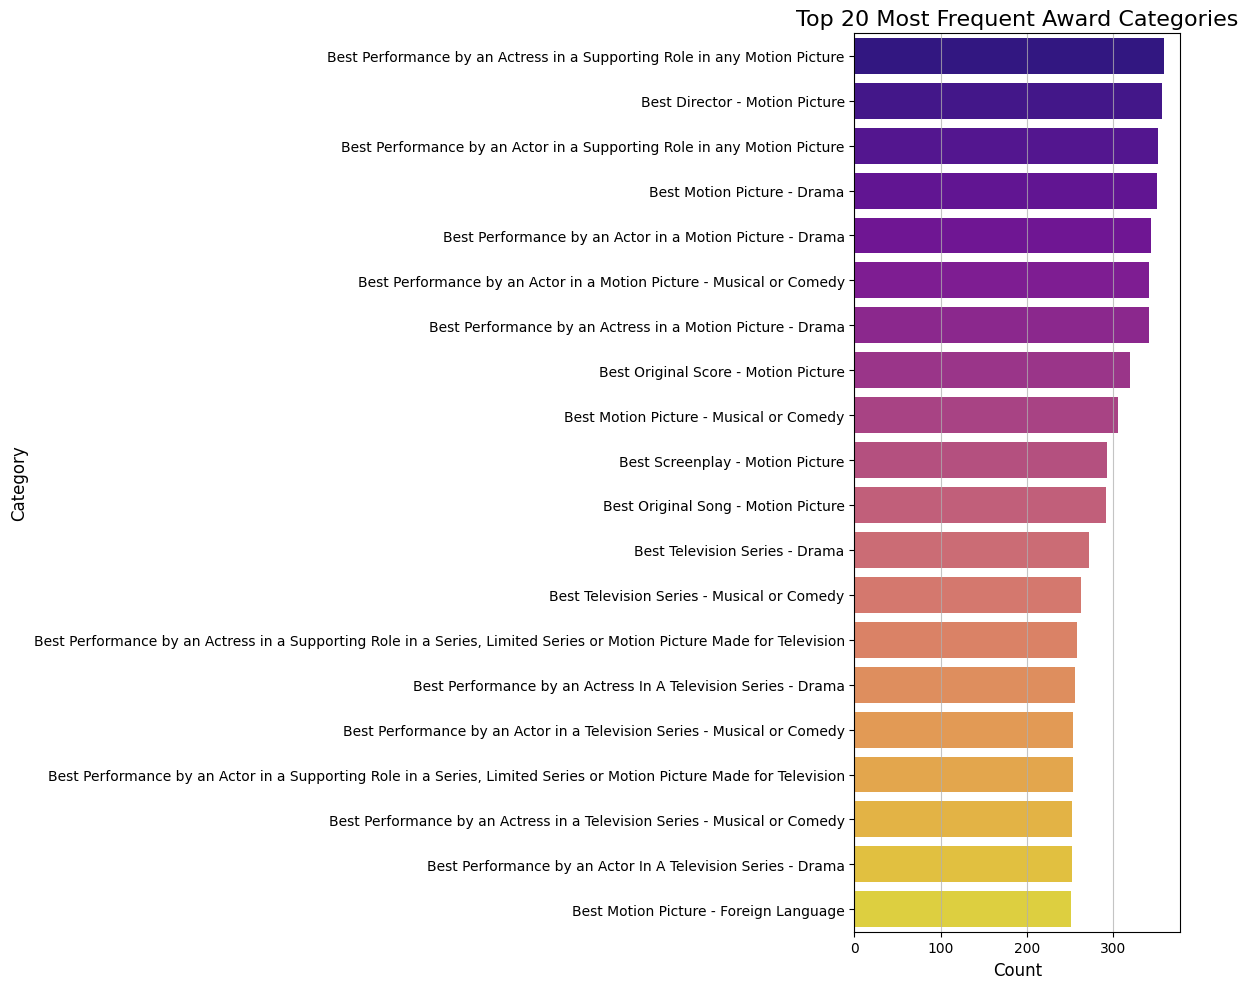

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and cleaned

## Get the top 20 categories by count
top_20_categories = df['category'].value_counts().nlargest(20).index

## Filter the DataFrame to include only the top 20 categories
df_top_20 = df[df['category'].isin(top_20_categories)]

## Create the count plot for the top 20 categories
plt.figure(figsize=(12, 10)) # Adjust figure size to accommodate 20 bars

# --- FIX: Remove 'loc' from sns.countplot arguments ---
sns.countplot(data=df_top_20, y='category', order=top_20_categories, palette='plasma')
# ------------------------------------------------------

## Set plot titles and labels
# Center the title using x and ha in plt.title()
plt.title('Top 20 Most Frequent Award Categories', fontsize=16, x=0.5, ha='center')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

## Add a grid for better readability
plt.grid(axis='x', alpha=0.75)

## Adjust layout
plt.tight_layout()

## Display the plot
plt.show();